In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from config import getClient
from checkStationary import ADF
from statsmodels.tsa.arima_model import ARIMA

In [86]:
dataloc = getClient("MC")

In [131]:
df = pd.read_csv(dataloc+"UAEseries.csv")

train = df.head(-12)
test = df.tail(12)

# Check that both record counts and dollar values got split correctly
assert (train.shape[0] + test.shape[0] == df.shape[0])
assert (train["Amount"].sum() + test["Amount"].sum() == df["Amount"].sum())

In [132]:
series = train["Amount"]

In [133]:
adjusted = series - series.rolling(12).mean()

In [134]:
stationary = ADF(adjusted[-12:], "5%", False)
print("Series is stationary: {}".format(stationary))

Series is stationary: True


In [135]:
#adjusted = adjusted[-18:]
adjusted = adjusted[11:]
adjusted = adjusted.reset_index(drop=True)

In [136]:
adjusted

0     -33075.933613
1    -152102.877137
2     -87703.387251
3        533.652455
4    -116695.326207
5    -165399.042519
6    -118808.977346
7    -262315.995514
8     -26785.782124
9      22890.336018
10    -43461.059640
11    -66019.931456
12    -19643.551633
13   -101372.637987
14    -97068.343972
15    -56723.616243
16    -84254.565356
17   -105837.725257
Name: Amount, dtype: float64

In [138]:
model = ARIMA(adjusted, order=(7,0,1))
model_fit = model.fit(disp=0)

/home/tbrownex/tensorflow/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/tbrownex/tensorflow/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/tbrownex/tensorflow/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/tbrownex/tensorflow/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/tbrownex/tensorflow/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:606: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/home/tbrownex/tensorflow/lib/python3.5/sit

In [140]:
forecast = model_fit.forecast(steps=6)[0]

In [141]:
forecast

array([nan, nan, nan, nan, nan, nan])

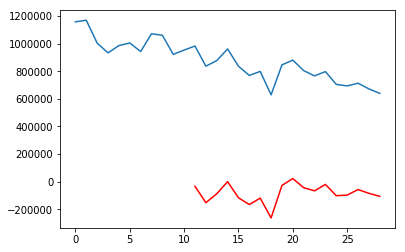

In [103]:
plt.plot(series)
plt.plot(adjusted, color='red')

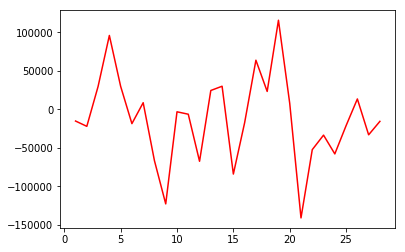

In [49]:
model = ARIMA(series, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
#plt.plot(series)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

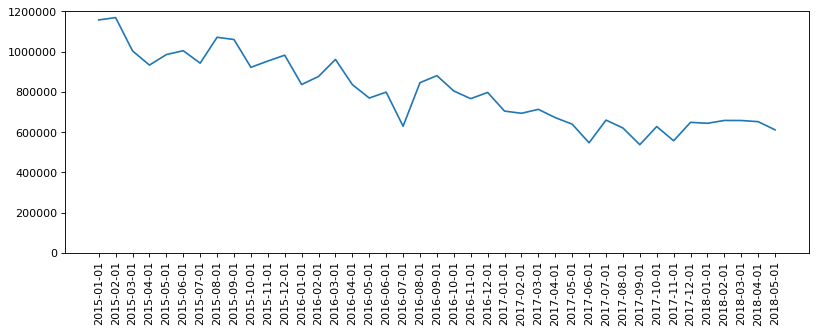

In [14]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(a, b)
plt.xticks(rotation=90)
plt.ylim(0)
plt.show()